<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
from scipy import stats

In [2]:
seaborn.__version__

'0.9.0'

In [3]:
dataset = pandas.read_csv('hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [4]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [5]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [6]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

### RTA 1
1. 
2. No por que las variables son continuas entonces es muy poco probable encontrar una moda y de todas formas si existiese no aportaría mucho al análisis.
3. En el gráfico de ambas variables en el tiempo agrupadas por región podemos ver que no existen valores que generen ruido. La variable hf_score es menos variable a lo largo del tiempo en cambio pf_identity presenta mayores variaciones a lo largo del paso de los años.
4. Siendo que son variables numéricas, reemplazar los valores NaN por 0 distorsionaría la muestra, por lo que pienso que es conveniente eliminar las filas que tengan valores NaN del análisis. Por ejemplo: Iraq.
5. En el análisis realizado por región no encontré outliers. En primer lugar analice la desviación estandar de todas las regiones. Consideré alta la std de 3 regiones: Middle East & North Africa, Subsaharan Africa y South Asia. A continuación, grafiqué en el tiempo los variables de pf_identity de los países de esas regiones pudiendo ver que no había picos que considerar como outliers. Lo que si encontré es una variación importante en un momento del tiempo pero que se prolongó mas de un año por lo que no lo considero un algo aislado.



In [7]:
gt_data = dataset[important_cols]
gt_data.columns
gt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 17 columns):
year                             1458 non-null int64
ISO_code                         1458 non-null object
countries                        1458 non-null object
region                           1458 non-null object
pf_identity_legal                205 non-null float64
pf_identity_parental_marriage    923 non-null float64
pf_identity_parental_divorce     923 non-null float64
pf_identity_parental             1358 non-null float64
pf_identity_sex_male             1375 non-null float64
pf_identity_sex_female           1378 non-null float64
pf_identity_sex                  1378 non-null float64
pf_identity_divorce              585 non-null float64
pf_identity                      1378 non-null float64
ef_score                         1378 non-null float64
ef_rank                          1378 non-null float64
hf_score                         1378 non-null float64
hf_rank               

In [8]:
gt_data

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


## Rango de las variables

In [9]:
gt_max = pandas.DataFrame(gt_data[important_cols].max())
gt_min = pandas.DataFrame(gt_data[important_cols].min())
gt_max


,0
year,2016
ISO_code,ZWE
countries,Zimbabwe
region,Western Europe
pf_identity_legal,10
pf_identity_parental_marriage,10
pf_identity_parental_divorce,10
pf_identity_parental,10
pf_identity_sex_male,10
pf_identity_sex_female,10


### Countplot de países por región
Esto nos permite tener una idea de que tan representativa es la muestra de países por región

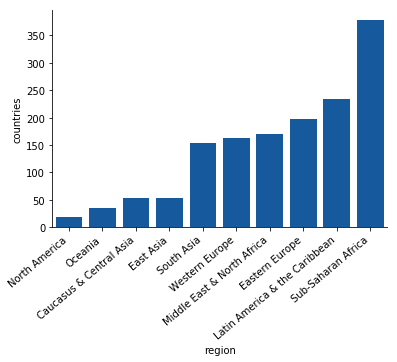

In [10]:
ccplot = gt_data[['countries','region']].sort_values('countries',ascending='False')
ccplot = ccplot.groupby('region').count()
ccplot = ccplot.reset_index(['region']).sort_values('countries',ascending='False')

countrie_x_reg = seaborn.barplot(data=ccplot, x='region',y='countries', color='#0059b3')
countrie_x_reg.set_xticklabels(countrie_x_reg.get_xticklabels(),rotation=40, ha='right')
seaborn.despine()

Podemos ver que existe una gran variabilidad entre las muestras de la cantidad de países por region. Esto es importante considerar al momento de realizar los análisis siguientes.

## Cálculo de la media por región

In [11]:
dataset_max = gt_data.max()
dataset_min = gt_data.min()
gt_data_reg = gt_data.groupby(['region']).mean()
mean_data = gt_data_reg[['pf_identity', 'hf_score']].reset_index(['region'])
mean_data

,region,pf_identity,hf_score
0,Caucasus & Central Asia,8.714744,6.879506
1,East Asia,9.861111,7.813020
2,Eastern Europe,9.683333,7.671637
3,Latin America & the Caribbean,8.765086,7.047982
4,Middle East & North Africa,2.830000,6.051464
5,North America,9.833333,8.461915
6,Oceania,9.152778,7.858762
7,South Asia,5.735294,6.533740
8,Sub-Saharan Africa,5.567050,6.256850
9,Western Europe,9.871399,8.368293


## Cálculo de la mediana

In [12]:
dataset_max = gt_data.max()
dataset_min = gt_data.min()
gt_data_reg = gt_data.groupby(['region']).median()
median_data = gt_data_reg[['pf_identity', 'hf_score']]
median_data 

,pf_identity,hf_score
region,,
Caucasus & Central Asia,8.333333,6.766759
East Asia,10.000000,8.109151
Eastern Europe,10.000000,7.814029
Latin America & the Caribbean,10.000000,7.028045
Middle East & North Africa,2.500000,6.289613
North America,10.000000,8.484161
Oceania,10.000000,8.033486
South Asia,5.833333,6.585634
Sub-Saharan Africa,5.000000,6.276072


## Cálculo de desviación estandar

In [13]:
dataset_max = gt_data.max()
dataset_min = gt_data.min()
gt_data_reg = gt_data.groupby(['region']).std()
std_data = gt_data_reg[['pf_identity', 'hf_score']]
std_data

,pf_identity,hf_score
region,,
Caucasus & Central Asia,1.429093,0.577477
East Asia,0.294071,0.947502
Eastern Europe,0.768090,0.554830
Latin America & the Caribbean,1.711732,0.608904
Middle East & North Africa,3.165090,0.906600
North America,0.320844,0.176386
Oceania,1.415826,0.915284
South Asia,3.302767,0.697855
Sub-Saharan Africa,2.445204,0.694003


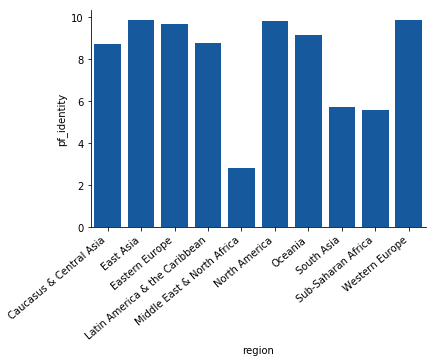

In [14]:
#Barplot de la media pf_identity
barplot_pf = seaborn.barplot(data=mean_data, x='region',y='pf_identity', color='#0059b3')
barplot_pf.set_xticklabels(barplot_pf.get_xticklabels(),rotation=40, ha='right')
seaborn.despine()

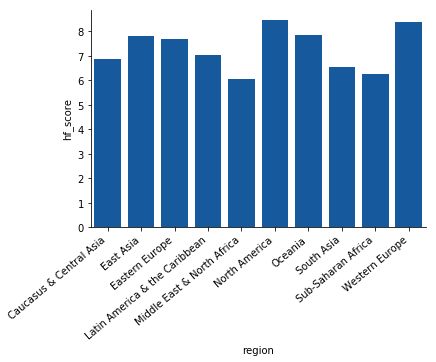

In [15]:
#Barplot de la mediana de hf_score
barplot_pf = seaborn.barplot(data=mean_data, x='region',y='hf_score', color='#0059b3')
barplot_pf.set_xticklabels(barplot_pf.get_xticklabels(),rotation=40, ha='right')
seaborn.despine()

In [16]:
gt_data['region'].unique()

array(['Eastern Europe', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Latin America & the Caribbean',
       'Caucasus & Central Asia', 'Oceania', 'Western Europe',
       'South Asia', 'North America', 'East Asia'], dtype=object)

## Gráfico de pf_identity en el tiempo por región

## Análisis de Regiones con Alta Desviación Estandar

- Middle East & North Africa

In [17]:
alta_std_me_af = gt_data
alta_std_me_af = alta_std_me_af[alta_std_me_af['region'] == 'Middle East & North Africa']
alta_std_me_af['pf_identity'].describe()

count    150.000000
mean       2.830000
std        3.165090
min        0.000000
25%        0.000000
50%        2.500000
75%        4.791667
max       10.000000
Name: pf_identity, dtype: float64

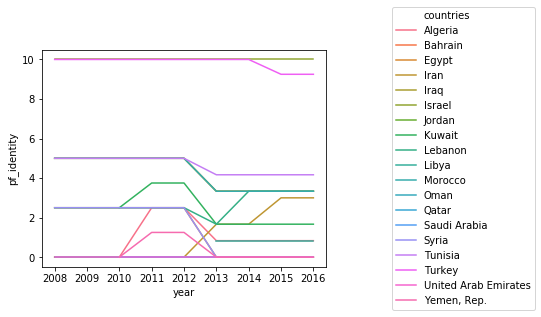

In [18]:
# EDIT: I Needed to ad the fig
fig, ax1 = plt.subplots(1,1)

# EDIT: 
# T.W.' answer said: "create with hue but without legend" <- # I needed to include it!
# So, removed: legend=False
alta_std_me_af_gra = seaborn.lineplot(data=alta_std_me_af,x='year', y='pf_identity',color='#0059b3',hue="countries",ci=None)

# EDIT: 
# Removed 'ax' from T.W.'s answer here aswell:
box = alta_std_me_af_gra.get_position()
alta_std_me_af_gra.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# Put a legend to the right side
alta_std_me_af_gra.legend(loc='center right', bbox_to_anchor=(1.75, 0.5), ncol=1)

plt.show()

Si bien no se distinguen algunos de los colores del gráfico para identificar puntualmente algunos países con colores similares, el objetivo de realizar este gráfico es identificar algun salto puntual en un momento del tiempo. Lo que se puede ve es que no hay cambios bruscos en un momento del tiempo particular.

In [19]:
test_africa = alta_std_me_af.groupby(['countries']).std()
test_africa = test_africa[['pf_identity', 'hf_score']]
test_africa

,pf_identity,hf_score
countries,,
Algeria,0.972222,0.044538
Bahrain,0.878410,0.188140
Egypt,1.317616,0.482424
Iran,1.317030,0.361563
Iraq,NaN,NaN
Israel,0.000000,0.147626
Jordan,0.878410,0.131945
Kuwait,0.853348,0.225117
Lebanon,0.629941,0.151943


- Sub-saharan Africa

In [20]:
alta_std_ss_af = gt_data
alta_std_ss_af = alta_std_ss_af[alta_std_ss_af['region'] == 'Sub-Saharan Africa']
alta_std_ss_af['pf_identity'].describe()

count    348.000000
mean       5.567050
std        2.445204
min        0.000000
25%        4.062500
50%        5.000000
75%        7.500000
max       10.000000
Name: pf_identity, dtype: float64

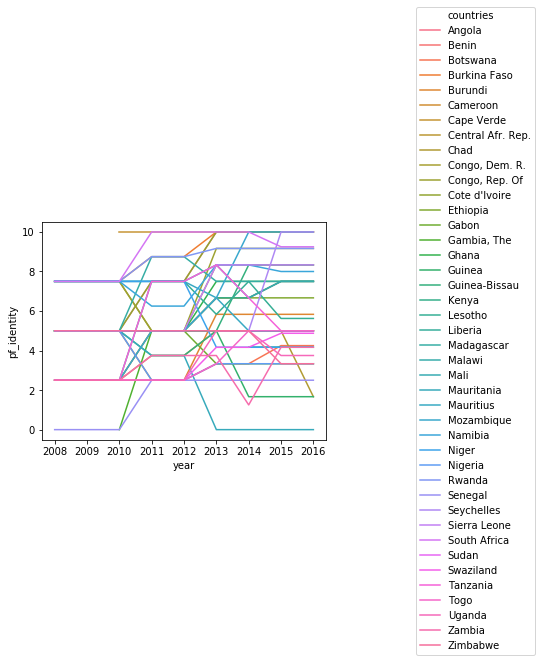

In [21]:
# EDIT: I Needed to ad the fig
fig, ax1 = plt.subplots(1,1)

# EDIT: 
# T.W.' answer said: "create with hue but without legend" <- # I needed to include it!
# So, removed: legend=False
alta_std_ss_af_gra = seaborn.lineplot(data=alta_std_ss_af,x='year', y='pf_identity',color='#0059b3',hue="countries",ci=None)

# EDIT: 
# Removed 'ax' from T.W.'s answer here aswell:
box = alta_std_ss_af_gra.get_position()
alta_std_ss_af_gra.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# Put a legend to the right side
alta_std_ss_af_gra.legend(loc='center right', bbox_to_anchor=(1.75, 0.5), ncol=1)

plt.show()

In [22]:
test_africa = alta_std_ss_af.groupby(['countries']).std()
test_africa = test_africa[['pf_identity', 'hf_score']]
test_africa = test_africa[test_africa['pf_identity']>2]
filtro_countries = test_africa.reset_index('countries')['countries'].values
filtro_countries

array(['Angola', 'Benin', "Cote d'Ivoire", 'Lesotho', 'Mauritania',
       'Mozambique', 'Seychelles', 'Tanzania'], dtype=object)

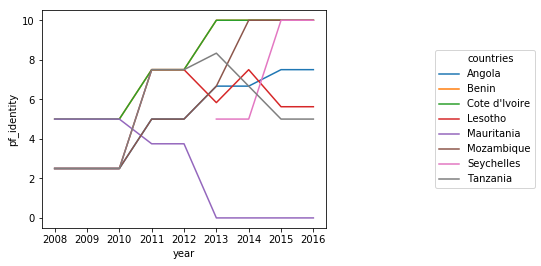

In [23]:
countries_alta_std = alta_std_ss_af[alta_std_ss_af.countries.isin(filtro_countries)]
countries_alta_std = countries_alta_std[['year','countries','pf_identity']]

# EDIT: I Needed to ad the fig
fig, ax1 = plt.subplots(1,1)

# EDIT: 
# T.W.' answer said: "create with hue but without legend" <- # I needed to include it!
# So, removed: legend=False
countries_alta_std_gra = seaborn.lineplot(data=countries_alta_std,x='year', y='pf_identity',color='#0059b3',hue="countries",ci=None)

# EDIT: 
# Removed 'ax' from T.W.'s answer here aswell:
box = countries_alta_std_gra.get_position()
countries_alta_std_gra.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# Put a legend to the right side
countries_alta_std_gra.legend(loc='center right', bbox_to_anchor=(1.75, 0.5), ncol=1)

plt.show()


## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

### Gráfico pf_identity y hf_score a través de los años

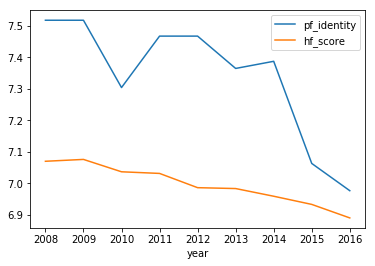

In [24]:
mean_pf_hf = gt_data[['year','pf_identity','hf_score']]
mean_pf_hf = mean_pf_hf.dropna()
mean_pf_hf = mean_pf_hf.groupby('year').mean().reset_index('year')
mean_pf_hf.plot(x='year',y=['pf_identity','hf_score'])


### Media pf_identity en el tiempo por región

1. Tabla con la media de ambas variables a lo largo de los años

In [25]:
mean_time = gt_data.set_index(['year'])
mean_time = mean_time[['region','pf_identity','hf_score']].groupby(['year','region']).mean()
mean_time = mean_time.reset_index(['region','year'])
mean_time.head()

,year,region,pf_identity,hf_score
0,2008,Caucasus & Central Asia,9.500000,7.027743
1,2008,East Asia,10.000000,7.741378
2,2008,Eastern Europe,9.880952,7.710244
3,2008,Latin America & the Caribbean,8.900000,7.118196
4,2008,Middle East & North Africa,3.653846,6.342013


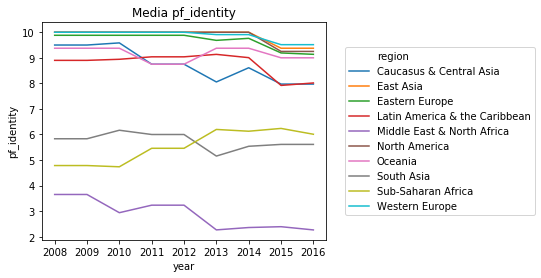

In [26]:

mean_time_pf_gra = seaborn.lineplot(data=mean_time,x='year',y='pf_identity',hue='region', color='#0059b3')

# Removed 'ax' from T.W.'s answer here aswell:
box = mean_time_pf_gra.get_position()
mean_time_pf_gra.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# Put a legend to the right side
mean_time_pf_gra.legend(loc='center right', bbox_to_anchor=(1.75, 0.5), ncol=1)
plt.title('Media pf_identity')
plt.show()

### Media de hf_score en el tiempo por región

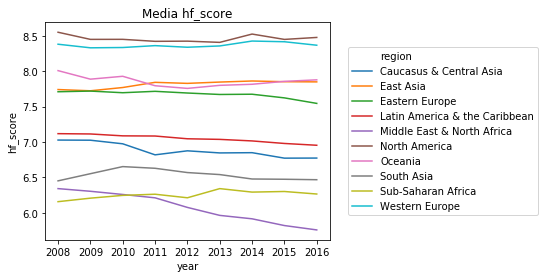

In [27]:
mean_time_pf_gra = seaborn.lineplot(data=mean_time,x='year',y='hf_score',hue='region', color='#0059b3')

# Removed 'ax' from T.W.'s answer here aswell:
box = mean_time_pf_gra.get_position()
mean_time_pf_gra.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# Put a legend to the right side
mean_time_pf_gra.legend(loc='center right', bbox_to_anchor=(1.75, 0.5), ncol=1)
plt.title('Media hf_score')
plt.show()

### Análisis región latina

In [28]:
alta_std_latin = gt_data
alta_std_latin = alta_std_latin[alta_std_latin['region'] == 'Latin America & the Caribbean']
alta_std_latin['pf_identity'].describe()

count    232.000000
mean       8.765086
std        1.711732
min        5.000000
25%        7.500000
50%       10.000000
75%       10.000000
max       10.000000
Name: pf_identity, dtype: float64

In [29]:
test_latin = alta_std_latin.groupby(['countries']).std()
test_latin = test_latin[['pf_identity']]
test_latin

,pf_identity
countries,
Argentina,0.000000
Bahamas,0.000000
Barbados,0.000000
Belize,0.833333
Bolivia,0.000000
Brazil,1.102396
Chile,2.273709
Colombia,0.000000
Costa Rica,1.320814


Nos quedamos con los países con STD > 2 

In [30]:
test_latin = alta_std_latin.groupby(['countries']).std()
test_latin = test_latin[['pf_identity']]
test_latin = test_latin[test_latin['pf_identity']>2]
filtro_latin = test_latin.reset_index('countries')['countries'].values
filtro_latin

array(['Chile', 'Guyana'], dtype=object)

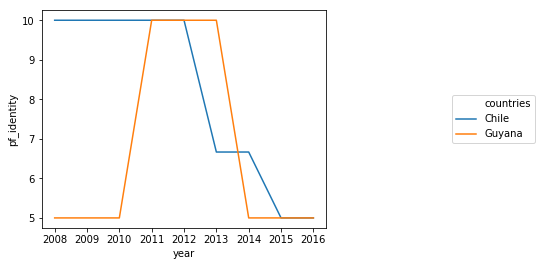

In [31]:
latin_alta_std = alta_std_latin[alta_std_latin.countries.isin(filtro_latin)]
latin_alta_std = latin_alta_std[['year','countries','pf_identity']]

# EDIT: I Needed to ad the fig
fig, ax1 = plt.subplots(1,1)

# EDIT: 
# T.W.' answer said: "create with hue but without legend" <- # I needed to include it!
# So, removed: legend=False
latin_alta_std_gra = seaborn.lineplot(data=latin_alta_std,x='year', y='pf_identity',color='#0059b3',hue="countries",ci=None)

# EDIT: 
# Removed 'ax' from T.W.'s answer here aswell:
box = latin_alta_std_gra.get_position()
latin_alta_std_gra.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# Put a legend to the right side
latin_alta_std_gra.legend(loc='center right', bbox_to_anchor=(1.75, 0.5), ncol=1)

plt.show()


## 2. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

### Pf_identity Global

C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


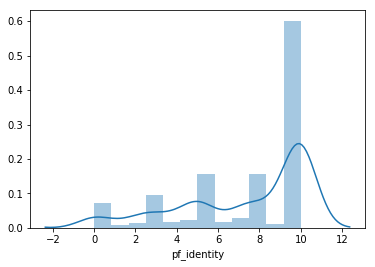

In [32]:
seaborn.distplot(gt_data['pf_identity'].dropna())

Podemos ver que el gráfico tiene una distribución anormal en el valor 10 ya que concentra muchos valores.  En caso intentaramos remover outliers lejanos a 2.5 std de la media podemos ver que no removemos ninguno. Proseguimos a analizar el comportamiento de hf_score

In [33]:
pf_ident_glo = gt_data['pf_identity']
# Eliminar filas a más de 2.5 desviaciones estándares de la media
mask_pf_id_glo = numpy.abs(pf_ident_glo-pf_ident_glo.mean()) <= (2.5*pf_ident_glo.std())
pf_ident_glo_hist = pf_ident_glo[mask_pf_id_glo]
print("Filas removidas", pf_ident_glo.count() - pf_ident_glo_hist.count())
print("pf_identity Max", pf_ident_glo_hist.max())

Filas removidas 0
pf_identity Max 10.0


Graficamos un boxplot de pf_identity por región que nos permite ver claramente como muchas regiones concentran sus valores en 10 con valores outliers por debajo. Esto ayuda a entender visualmente de manera integral la tendencia del histograma anterior hacia el valor 10.

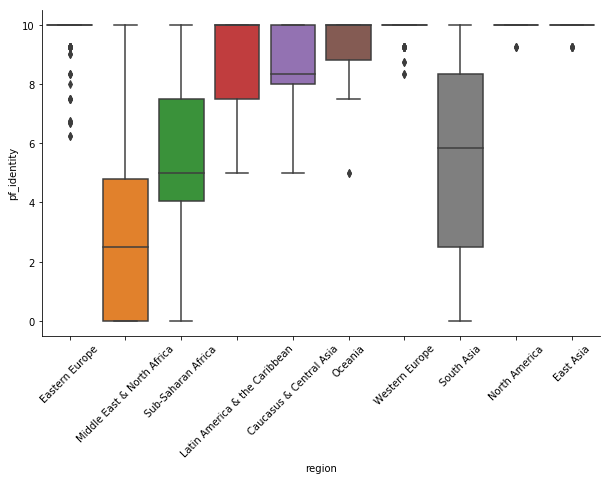

In [34]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=gt_data,
                x='region', y='pf_identity')
plt.ylabel('pf_identity')
plt.xlabel('region')
plt.xticks(rotation=45)
seaborn.despine()

### Hf_score Global

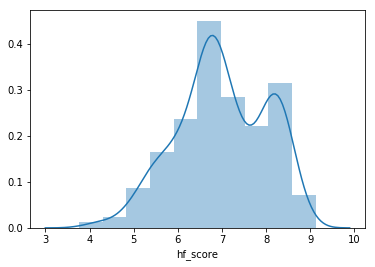

In [35]:
seaborn.distplot(gt_data['hf_score'].dropna(), bins=10)

Este comportamiento parece normal a simple vista con picos entre el 8 y el 9.

Realizamos un boxplot de esta variable por región para visualizar con mas claridad la distribución.

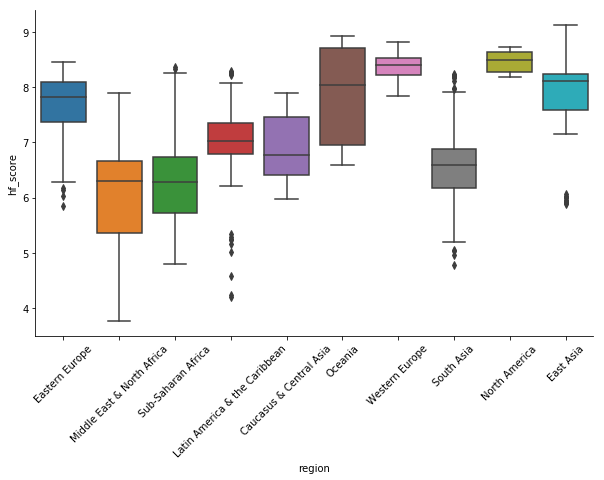

In [36]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=gt_data,
                x='region', y='hf_score')
plt.ylabel('hf_score')
plt.xlabel('region')
plt.xticks(rotation=45)
seaborn.despine()

En este caso, podemos que la distribución de Western Europe y North America esta distribuida de manera normal entre 8 y 9. De esta forma podemos ver que el pico de valores 

### Pf_identity Latinoamerica

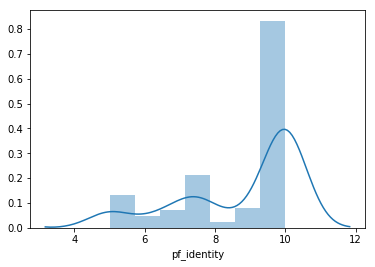

In [37]:
pf_id_latin = gt_data
pf_id_latin = pf_id_latin[pf_id_latin['region'] == 'Latin America & the Caribbean']
seaborn.distplot(pf_id_latin['pf_identity'].dropna())

### Histogramas PF Conjuntos

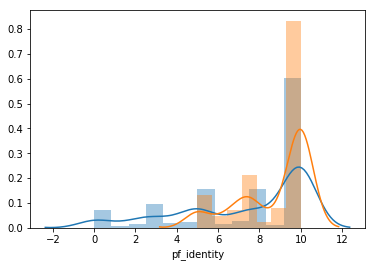

In [38]:
seaborn.distplot(gt_data['pf_identity'].dropna())
seaborn.distplot(pf_id_latin['pf_identity'].dropna())

### Hf_score Latinoamerica

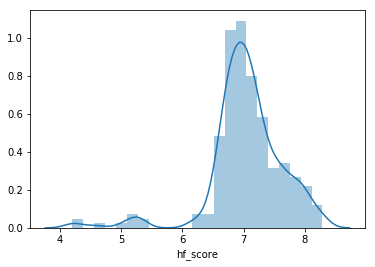

In [39]:
hf_sc_latin = gt_data
hf_sc_latin = hf_sc_latin[hf_sc_latin['region'] == 'Latin America & the Caribbean']
seaborn.distplot(hf_sc_latin['hf_score'].dropna())

### Histogramas HF conjuntos

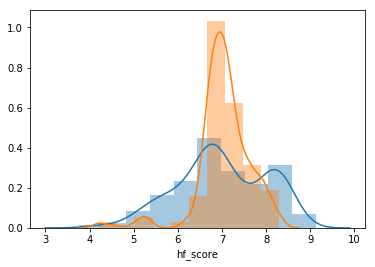

In [40]:
seaborn.distplot(gt_data['hf_score'].dropna(), bins=10)
seaborn.distplot(hf_sc_latin['hf_score'].dropna(),bins=10)


Intentamos mover los outliers con el mismo método anterior y podemos ver que se remueven 10 filas por lo que volvemos a graficar.

In [41]:
hf_sc_lat = gt_data['hf_score']
# Eliminar filas a más de 2.5 desviaciones estándares de la media
mask_hf_sc_lat = numpy.abs(hf_sc_lat-hf_sc_lat.mean()) <= (2.5*hf_sc_lat.std())
hf_sc_lat_hist = hf_sc_lat[mask_hf_sc_lat]
print("Filas removidas", hf_sc_lat.count() - hf_sc_lat_hist.count())
print("pf_identity Max", hf_sc_lat_hist.max())

Filas removidas 10
pf_identity Max 9.126312939


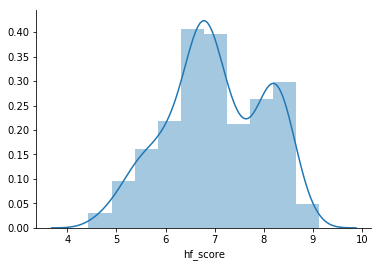

In [42]:
seaborn.distplot(hf_sc_lat_hist, bins=10)
seaborn.despine()

En este caso el gráfico se lo ve mas centrado en 7 pero con dos picos entre 8 y 9 (comportamiento similar al de pf_identity)

### KTest pf_identity global

In [43]:
pf_ident_glo = gt_data['pf_identity'].dropna()

In [44]:
# Estimamos los parámetros muestrales. Si bien son sólo la media y desviación estándar, podemos
# usar scipy para estimar (fit) cualquier distribución.
loc, scale = stats.norm.fit(pf_ident_glo)
loc, scale

(7.334179970968069, 3.1583260555019637)

In [45]:
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)

In [46]:
stats.kstest(sample,'norm')

KstestResult(statistic=0.9397360806192376, pvalue=0.0)

In [47]:
stats.kstest(pf_ident_glo,'norm')

KstestResult(statistic=0.9146901895363428, pvalue=0.0)

Al ser p-value = 0 no podemos decir que la distribución de esta variable es normal

### QQ Plot entre pf_identity global y distribución normal

- Primero graficamos el histograma de la distribución normal creada y pf_identity global

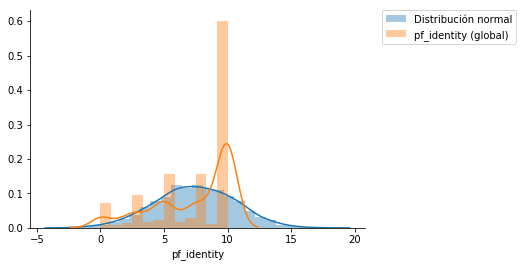

In [83]:
# La graficamos
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(pf_ident_glo, label='pf_identity (global)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

- Luego armamos la muestra del mismo tamaño para armar el QQ Plot

In [85]:
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(pf_ident_glo, percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(pf_ident_glo)), percs)

- QQ plot

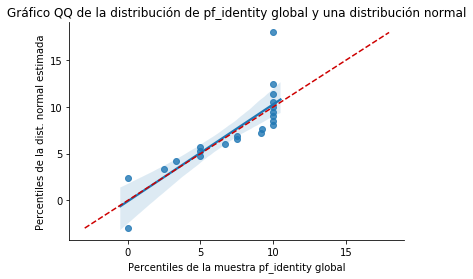

In [86]:
#plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra pf_identity global')
plt.ylabel('Percentiles de la dist. normal estimada')
plt.title('Gráfico QQ de la distribución de pf_identity global y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color='#ce0000', ls="--")

seaborn.despine()

Si bien parecen tener un comportamiento parecido, podemos ver como los valores de pf_identity se concentran en el valor 10. Ese es el mismo pico que se vió anteriormente en el histograma.

- Invertimos las variables en el gráfico

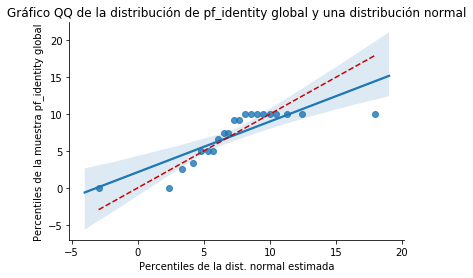

In [90]:
#plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_norm_dist, y=qn_sample)
plt.xlabel('Percentiles de la dist. normal estimada')
plt.ylabel('Percentiles de la muestra pf_identity global')
plt.title('Gráfico QQ de la distribución de pf_identity global y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color='#ce0000', ls="--")

seaborn.despine()

- Asimetría de pf_identity global

In [87]:
stats.skew(qn_sample)


-0.9158386722697632

En este caso como el CAF < 0 podemos validar lo observado en el histograma anterior donde si bien veíamos un pico de valores cercanos a 10, la curva esta sesgada hacia la derecha con la mayoría de valores inferiores a la media.

- Asimetría variable distribución normal

In [88]:
stats.skew(qn_norm_dist)

0.07236517681123157

Si bien esta distribución normal fue armada por nosotros, el hecho de realizar este analísis y obvservar que nos da un CAF muy cercano a cero nos sirvió para validar que la distribución es normal ya que sus valores estan concentrados cerca de la media.

- Relación de los estadísticos con el QQ PLOT

Los comentarios anteriores nos relacionaron estos estadísticos con el histograma superpuesto de ambas distribuciones.

En el caso del QQ plot, la cantidad de puntos acumulados en el valor 10 de la distribución de pf_identity nos permita validar lo obtenido en primer lugar: CAF < 0.



### KTest hf_score global

In [48]:
hf_score_glo = gt_data['hf_score'].dropna()
stats.kstest(hf_score_glo,'norm')

KstestResult(statistic=0.9999170006054449, pvalue=0.0)

Al ser p-value = 0 no podemos decir que la distribución de esta variable es normal

### KTest pf_identity latinoamerica

In [49]:
pf_identity_latin = gt_data
pf_identity_latin = pf_identity_latin[pf_identity_latin['region'] == 'Latin America & the Caribbean']
stats.kstest(pf_identity_latin['pf_identity'].dropna(),'norm')

KstestResult(statistic=0.9999997133484281, pvalue=0.0)

Al ser p-value = 0 no podemos decir que la distribución de esta variable es normal

### KTest hf_score latinoamerica

In [50]:
hf_score_latin = gt_data
hf_score_latin = hf_score_latin[hf_score_latin['region'] == 'Latin America & the Caribbean']
stats.kstest(hf_score_latin['hf_score'].dropna(),'norm')

KstestResult(statistic=0.9999866968877408, pvalue=0.0)

Al ser p-value = 0 no podemos decir que la distribución de esta variable es normal

### KTest para hf_score de  North America
Este test lo hacemos para validar lo expuesto en el boxplot donde podiamos suponer que North America tenia distribución normal

In [51]:
hf_score_nam = gt_data
hf_score_nam = hf_score_nam[hf_score_nam['region'] == 'North America']
stats.kstest(hf_score_nam['hf_score'].dropna(),'norm')

KstestResult(statistic=0.9999999999999999, pvalue=0.0)

Graficamente podemos que no tiene forma de campana como supusimos

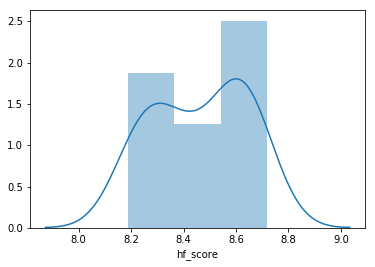

In [52]:
seaborn.distplot(hf_score_nam['hf_score'].dropna())

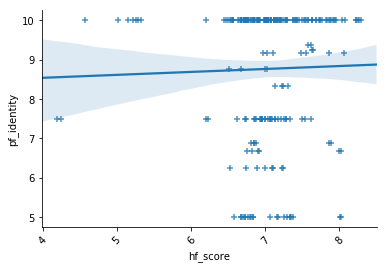

In [54]:
#Scatter plot con recta de identidad entre pf_identity y hf_score
seaborn.regplot(data=hf_score_latin,
                x='hf_score', y='pf_identity',
                marker='+')
plt.xticks(rotation=45)
seaborn.despine()

## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


1 y 2. Podemos ver como existen una correlación lineal mas clara entre hf_score y ef_score, ya que los puntos podrían asociarse de manera mas clara con una recta. No así en la comparación de pf_identity con estas. Esto nos indica que la variación de pf_identity no incide mucho en el comportamiento de  hf_score y ef_score. En la siguiente tabla vemos unos ejemplos, donde a muy alto valor de pf_identity, hf_score y ef_score no varían demasiado comparado con un caso donde el valor de pf_identity es muy bajo.

In [111]:
comp_pf_hf_ef = gt_data[['countries','pf_identity','hf_score','ef_score']].head(4)
comp_pf_hf_ef

,countries,pf_identity,hf_score,ef_score
0,Albania,6.250000,7.568140,7.54
1,Algeria,0.833333,5.135886,4.99
2,Angola,7.500000,5.640662,5.17
3,Argentina,10.000000,6.469848,4.84


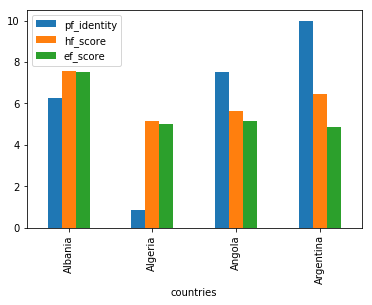

In [112]:
test_gt = comp_pf_hf_ef.set_index('countries').plot.bar()